Report:

Parallel Algorithm:
Decomposition: The input size is decomposed into equal parts based on the number of processes available and the current prime calculated is broadcasted to all the other processes.
First divisible value in each process: If the first value is not divisible by the prime then the remainder(r = firstValue%prime) is used to calculate the first divisible prime number using the formula startIndex = prime - remainder. The meaning of this formula is to say how many places should the startValue move to be divisible by prime.

Eliminating even integers:
Fact: Leverages the fact that 2 is the only even prime number.
Decomposition: The input size is reduced by half by the above fact and the prime number can be deduced from the index of the array using the formula p = 2*i + 1
Prime calculation: The same approach is followed as in the first algorithm. 
First divisible value in each process: The distance between the lowValue and the next divisible prime is calculated using the formula startVal = lowVal + prime - remainder since only odd integers are considered if the startVal from the previous formula turned out to be even then prime is again added to generate the first divisible value(since even + odd = odd).

Elimination broadcast:
The main communication between all the processes in the previous methods is to broadcast the current sieving prime, to eliminate that step all the primes <sqrt(n) are precalculated and stored in each of the processes.

Cache hit:
To leverage the cache, a block of the input array in each process is processed completely before stepping onto the next block.


In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.figure import Figure
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

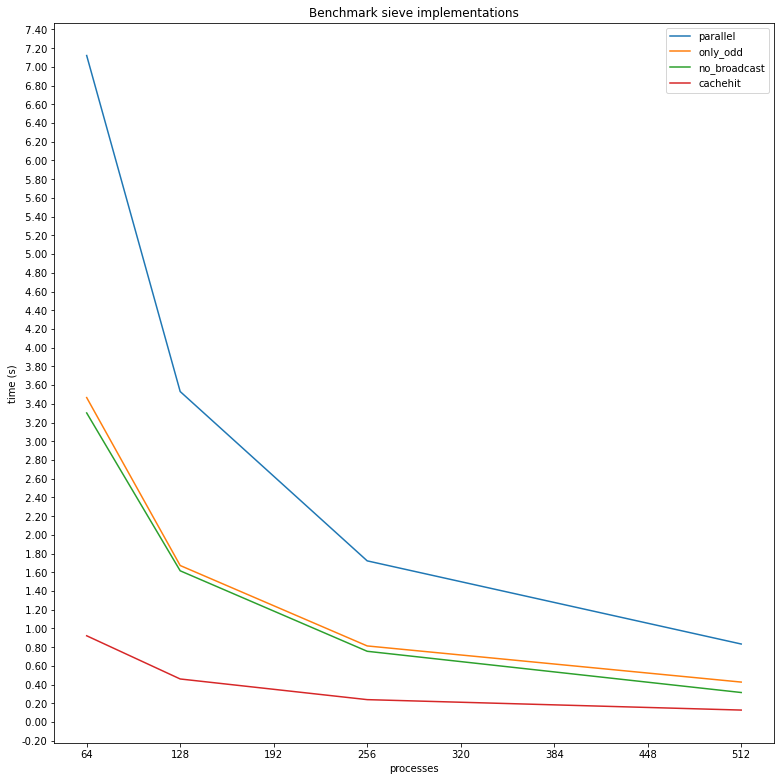

In [55]:
# ypoints1 = np.array([7.121486, 3.466678, 3.302563, 0.921523])
# ypoints2 = np.array([3.531183, 1.672209, 1.615805, 0.459895])
# ypoints3 = np.array([1.721986, 0.812992, 0.755818, 0.239177])
# ypoints4 = np.array([0.833410, 0.426704, 0.315242, 0.127623])

x1 = np.array([64, 128, 256, 512])
y1 = np.array([7.121486, 3.531183, 1.721986, 0.833410])
y2 = np.array([3.466678, 1.672209, 0.812992, 0.426704])
y3 = np.array([3.302563, 1.615805, 0.755818, 0.315242])
y4 = np.array([0.921523, 0.459895, 0.239177, 0.127623])
fig = plt.figure(figsize =(10, 10)) 
ax = fig.add_axes([1, 1, 1, 1])
ax.set_ylim(0, 8, auto=True)
ax.set_xlim(0, 550, auto=True)
ax.plot(x1, y1)
ax.plot(x1, y2)
ax.plot(x1, y3)
ax.plot(x1, y4)
ax.set_xlabel("processes")
ax.set_ylabel("time (s)")

ax.xaxis.set_major_locator(MultipleLocator(64))

ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_formatter(FormatStrFormatter('% 1.2f'))

plt.legend(["parallel", "only_odd", "no_broadcast", "cachehit"])
plt.title("Benchmark sieve implementations")
plt.show()